1 subject. Feature extraction. Classification joining all frequency bands.

In [1069]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import pickle
'''
files = os.listdir('d\\')

list_of_dfs = []
for file in files:
    with open(os.path.join('d\\',file), 'rb') as pickle_file:
        dictRaw = pd.read_pickle(pickle_file) 
        labels = dictRaw.get('labels')
        data = dictRaw.get('data')
        
        dfLabels = pd.DataFrame(data=labels, columns=["valence", "arousal", "dominance", "liking"])

        a,b,c = data.shape
        E = data.reshape(40, 322560)
        allData = pd.DataFrame(E).transpose()
        rows = list()
        for _,row in dfLabels.iterrows():
            rows += [row]*8064
        aux = pd.DataFrame(rows).reset_index(drop=True)
        allData = allData.merge(aux, left_index=True, right_index=True)
        
        list_of_dfs.append(allData)
data = pd.concat(list_of_dfs, ignore_index=True)

data.columns = ['FP1','AF3','F7','F3','FC1','FC5','T7','C3','CP1','CP5','P7','P3','Pz','PO3','O1','Oz','O2','PO4','P4','P8','CP6','CP2','C4','T8','FC6','FC2','F4','F8','AF4','Fp2','Fz','Cz','hEOG','vEOG','zEMG','tEMG','GSR','Respiration','PLethy','Temperature','valence', 'arousal', 'dominance', 'liking']

data.drop(['hEOG','vEOG','zEMG','tEMG','GSR','Respiration','PLethy','Temperature'],axis = 'columns', inplace=True)

data
'''

'\nfiles = os.listdir(\'d\\\')\n\nlist_of_dfs = []\nfor file in files:\n    with open(os.path.join(\'d\\\',file), \'rb\') as pickle_file:\n        dictRaw = pd.read_pickle(pickle_file) \n        labels = dictRaw.get(\'labels\')\n        data = dictRaw.get(\'data\')\n        \n        dfLabels = pd.DataFrame(data=labels, columns=["valence", "arousal", "dominance", "liking"])\n\n        a,b,c = data.shape\n        E = data.reshape(40, 322560)\n        allData = pd.DataFrame(E).transpose()\n        rows = list()\n        for _,row in dfLabels.iterrows():\n            rows += [row]*8064\n        aux = pd.DataFrame(rows).reset_index(drop=True)\n        allData = allData.merge(aux, left_index=True, right_index=True)\n        \n        list_of_dfs.append(allData)\ndata = pd.concat(list_of_dfs, ignore_index=True)\n\ndata.columns = [\'FP1\',\'AF3\',\'F7\',\'F3\',\'FC1\',\'FC5\',\'T7\',\'C3\',\'CP1\',\'CP5\',\'P7\',\'P3\',\'Pz\',\'PO3\',\'O1\',\'Oz\',\'O2\',\'PO4\',\'P4\',\'P8\',\'CP6\',\'CP2\',

In [1070]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#def select_file(file):
    #Lectura mediante pandas
f = "data_preprocessed_python\\s32.dat"
subject_id = 32
dictRaw = pd.read_pickle(f)

labels = dictRaw.get('labels')

dfLabels = pd.DataFrame(data=labels, columns=["valence", "arousal", "dominance", "liking"])

data = dictRaw.get('data')

df_videos = {}
    #Recorrido de cada una de las columnas de la tabla 3d, y guardado en una una lista de dataframes para cada uno de los videos.
for i in range(40):
    df_videos[i] = pd.DataFrame(data[i])
    df_videos[i] = df_videos[i].transpose()
    df_videos[i].columns = ['FP1','AF3','F7','F3','FC1','FC5','T7','C3','CP1','CP5','P7','P3','Pz','PO3','O1','Oz','O2','PO4','P4','P8','CP6','CP2','C4','T8','FC6','FC2','F4','F8','AF4','Fp2','Fz','Cz','hEOG','vEOG','zEMG','tEMG','GSR','Respiration','PLethy','Temperature']
    df_videos[i].drop(['hEOG','vEOG','zEMG','tEMG','GSR','Respiration','PLethy','Temperature'],axis = 'columns', inplace=True)

In [1071]:
    # Frecuencia de muestreo
    fs = 128
    # Window
    window = "hann"
    # Length of each segment
    # nperseg = 256 por defecto
    # noverlap
    # Por defecto a None, if None : noverlap = nperseg / 2
    # [...]

    # Definicion de bandas
    eeg_bands = {'Delta': (1, 4),
                'Theta': (4, 8),
                'Alpha': (8, 14),
                'Beta': (14, 30),
                'Gamma': (30, 50)}

In [1072]:
# FOURIER
import scipy
from scipy import signal

# SE COGE EL PRIMER VÍDEOS, Df_VIDEOS[0]
def do_stft(video, channel):
    # Array 
    x = df_videos[video][channel]

    # Array of the sample frequency, Array of the segment times, STFT of x
    f, t , Zxx = scipy.signal.stft(x, fs, window)

    #print(np.abs(Zxx))
    '''
    plt.pcolormesh(t, f, np.abs(Zxx), vmin=0, shading='gouraud')
    plt.ylabel('Frequency [Hz]')
    plt.xlabel('Time [sec]')
    plt.show()
    '''
    return Zxx


In [1073]:
#SEPARACION EN LAS DISTINTAS BANDAS DE FRECUENCIA

def make_bands(Zxx):
    #Obtener valores reales de STFT, solo positivos.
    values = np.absolute(Zxx)

    # Get frequencies for amplitudes in Hz
    fft_freq = np.fft.rfftfreq(len(data), 1.0/fs)
    #print(fft_freq)

    # Obtención de cada una de las bandas de frecuencia
    eeg_band_fft = dict()
    for band in eeg_bands:  
        freq_ix = np.where((fft_freq >= eeg_bands[band][0]) & (fft_freq <= eeg_bands[band][1]))[0]
        eeg_band_fft[band] = values[freq_ix]

    #print(eeg_band_fft)
    '''
    eeg_band_fft_means = dict()
    for band in eeg_bands:  
        freq_ix = np.where((fft_freq >= eeg_bands[band][0]) & (fft_freq <= eeg_bands[band][1]))[0]
        eeg_band_fft_means[band] = np.mean(values[freq_ix])

    #print(eeg_band_fft_means)

    #Graficación de las medias de los datos
    df = pd.DataFrame(columns=['band', 'val'])
    df['band'] = eeg_bands.keys()
    df['val'] = [eeg_band_fft_means[band] for band in eeg_bands]
    ax = df.plot.bar(x='band', y='val', legend=False)
    ax.set_xlabel("EEG band")
    ax.set_ylabel("Mean band Amplitude")
    '''
    #print(df)

    #print("\n\n")

    '''
    print("Shape de Zxx: ", Zxx.shape)
    print("Shape de Delta: ", eeg_band_fft['Delta'].shape)
    print("Shape de Theta: ", eeg_band_fft['Theta'].shape)
    print("Shape de Alpha: ", eeg_band_fft['Alpha'].shape)
    print("Shape de Beta: ", eeg_band_fft['Beta'].shape)
    print("Shape de Gamma: ", eeg_band_fft['Gamma'].shape)
    '''
    return eeg_band_fft


In [1074]:
# Ahora hay que hacer las medias sobre cada banda de frecuencia. La media entre cada una de las posiciones de los bloques. Hacer la media entre todas las posiciones 0, 1, 2... 63 de cada uno de los bloques
import numpy as np

def channel_freq(eeg_band_fft):
        
        freq = np.zeros((5, 64))        # 5 bandas, 64 posiciones de los datos

        # Se va a recorrer {Delta, Theta, Alpha, Beta, Gamma}
        for band in eeg_bands:

                # Para cada una de las 64 posiciones del array
                for j in range (0, 64):
                        
                        val = []
                        # Se va a recorrer cada uno de los arrays que hay en cada una de las bandas
                        for i in range (0, len(eeg_band_fft[band])):
                                val.append(eeg_band_fft[band][i][j])
                                # Ejemplo : eeg_band_fft['Delta'][0][0*0 + 0]
                        if (band == "Delta"):
                                freq[0][j] = np.mean(val)
                        elif (band == "Theta"):
                                freq[1][j] = np.mean(val)
                        elif (band == "Alpha"):
                                freq[2][j] = np.mean(val)
                        elif (band == "Beta"):
                                freq[3][j] = np.mean(val)
                        elif (band == "Gamma"):
                                freq[4][j] = np.mean(val)
        return(freq)     # En freq tenemos las frecuencias medias de cada una de las bandas

# Recordamos : Estamos tratando los datos relativos al video 0, un canal concreto de un sujeto concreto

In [1075]:
#df_file_videos = select_file('d\\s01.dat')
# Obtener la división por bandas de frecuencia de cada uno de los canales del video 0
for video in range(0, 40):
    delta_bands = []
    theta_bands = []
    beta_bands = []
    alpha_bands = []
    gamma_bands = []

    for channel in ['FP1','AF3','F7','F3','FC1','FC5','T7','C3','CP1','CP5','P7','P3','Pz','PO3','O1','Oz','O2','PO4','P4','P8','CP6','CP2','C4','T8','FC6','FC2','F4','F8','AF4','Fp2','Fz','Cz']:
        Zxx = do_stft(video, channel)
        eeg_band_fft = make_bands(Zxx)
        print(video)
        print("\n")
        print(channel)
        freq = channel_freq(eeg_band_fft)

        delta_bands.append(freq[0])
        theta_bands.append(freq[1])
        alpha_bands.append(freq[2])
        beta_bands.append(freq[3])
        gamma_bands.append(freq[4])
        
        print(freq[0])
        print("\n\n")
    # En freq tenemos la media de todas las bandas de frecuencia de cada uno de los canales del vídeo 0

0


FP1
[0.07197486 0.0788969  0.07788416 0.08482671 0.08322185 0.07347138
 0.07660066 0.07891476 0.08015575 0.07945536 0.07984092 0.0801692
 0.07856444 0.0788369  0.08013016 0.07973629 0.07819784 0.07983091
 0.08070658 0.07898606 0.07835632 0.08181738 0.07916013 0.07748302
 0.08016548 0.07933961 0.07849298 0.07892101 0.08011748 0.07910739
 0.07930859 0.07914827 0.07869986 0.07930196 0.07947262 0.07979962
 0.08098516 0.07828635 0.07822527 0.08031563 0.07924367 0.07888118
 0.0791222  0.07881912 0.07944596 0.08027647 0.07953217 0.08048551
 0.07881114 0.07742306 0.07970315 0.079797   0.07920323 0.07957535
 0.07933532 0.0793632  0.07966773 0.07965016 0.07900291 0.07887605
 0.07985552 0.07898546 0.0787886  0.05065337]



0


AF3
[0.90322005 0.14916106 0.15504126 0.14938295 0.1547471  0.15784238
 0.15073156 0.14805403 0.15583125 0.15378663 0.15623042 0.15573248
 0.15420895 0.15016295 0.14727569 0.15384115 0.15400342 0.15516873
 0.15137848 0.15156219 0.15591687 0.15208828 0.15197745 0.1550353

In [1076]:
# Banda delta
df = pd.DataFrame(delta_bands)
delta_df = df.transpose()
delta_df.columns = ['D-FP1','D-AF3','D-F7','D-F3','D-FC1','D-FC5','D-T7','D-C3','D-CP1','D-CP5','D-P7','D-P3','D-Pz','D-PO3','D-O1','D-Oz','D-O2','D-PO4','D-P4','D-P8','D-CP6','D-CP2','D-C4','D-T8','D-FC6','D-FC2','D-F4','D-F8','D-AF4','D-Fp2','D-Fz','D-Cz']
delta_df

rows = list()
for _,row in delta_df.iterrows():
    rows += [row]*40
aux_delta = pd.DataFrame(rows).reset_index(drop=True)

aux_delta

,D-FP1,D-AF3,D-F7,D-F3,D-FC1,D-FC5,D-T7,D-C3,D-CP1,D-CP5,...,D-C4,D-T8,D-FC6,D-FC2,D-F4,D-F8,D-AF4,D-Fp2,D-Fz,D-Cz
0,0.025366,0.078844,0.039507,0.094259,0.044156,0.037892,0.034969,0.148271,0.164957,0.033372,...,0.372899,0.035648,0.065213,0.052704,0.213639,0.099711,0.048500,0.074329,0.140679,0.029246
1,0.025366,0.078844,0.039507,0.094259,0.044156,0.037892,0.034969,0.148271,0.164957,0.033372,...,0.372899,0.035648,0.065213,0.052704,0.213639,0.099711,0.048500,0.074329,0.140679,0.029246
2,0.025366,0.078844,0.039507,0.094259,0.044156,0.037892,0.034969,0.148271,0.164957,0.033372,...,0.372899,0.035648,0.065213,0.052704,0.213639,0.099711,0.048500,0.074329,0.140679,0.029246
3,0.025366,0.078844,0.039507,0.094259,0.044156,0.037892,0.034969,0.148271,0.164957,0.033372,...,0.372899,0.035648,0.065213,0.052704,0.213639,0.099711,0.048500,0.074329,0.140679,0.029246
4,0.025366,0.078844,0.039507,0.094259,0.044156,0.037892,0.034969,0.148271,0.164957,0.033372,...,0.372899,0.035648,0.065213,0.052704,0.213639,0.099711,0.048500,0.074329,0.140679,0.029246
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2555,0.022481,0.172611,0.057046,0.109849,0.242265,0.070911,0.196101,0.334543,0.355690,0.188437,...,1.544856,0.022754,0.107385,0.062702,0.663288,0.398949,0.165376,0.216283,0.609451,0.048894
2556,0.022481,0.172611,0.057046,0.109849,0.242265,0.070911,0.196101,0.334543,0.355690,0.188437,...,1.544856,0.022754,0.107385,0.062702,0.663288,0.398949,0.165376,0.216283,0.609451,0.048894
2557,0.022481,0.172611,0.057046,0.109849,0.242265,0.070911,0.196101,0.334543,0.355690,0.188437,...,1.544856,0.022754,0.107385,0.062702,0.663288,0.398949,0.165376,0.216283,0.609451,0.048894
2558,0.022481,0.172611,0.057046,0.109849,0.242265,0.070911,0.196101,0.334543,0.355690,0.188437,...,1.544856,0.022754,0.107385,0.062702,0.663288,0.398949,0.165376,0.216283,0.609451,0.048894


In [1077]:
# Banda theta
df = pd.DataFrame(theta_bands)
theta_df = df.transpose()
theta_df.columns =  ['T-FP1','T-AF3','T-F7','T-F3','T-FC1','T-FC5','T-T7','T-C3','T-CP1','T-CP5','T-P7','T-P3','T-Pz','T-PO3','T-O1','T-Oz','T-O2','T-PO4','T-P4','T-P8','T-CP6','T-CP2','T-C4','T-T8','T-FC6','T-FC2','T-F4','T-F8','T-AF4','T-Fp2','T-Fz','T-Cz']
theta_df

rows = list()
for _,row in theta_df.iterrows():
    rows += [row]*40
aux_theta = pd.DataFrame(rows).reset_index(drop=True)

aux_theta

,T-FP1,T-AF3,T-F7,T-F3,T-FC1,T-FC5,T-T7,T-C3,T-CP1,T-CP5,...,T-C4,T-T8,T-FC6,T-FC2,T-F4,T-F8,T-AF4,T-Fp2,T-Fz,T-Cz
0,0.018908,0.119647,0.045046,0.120408,0.052348,0.033803,0.062029,0.194587,0.230034,0.050673,...,0.575209,0.041922,0.079025,0.087149,0.303126,0.145937,0.071534,0.109496,0.221562,0.047842
1,0.018908,0.119647,0.045046,0.120408,0.052348,0.033803,0.062029,0.194587,0.230034,0.050673,...,0.575209,0.041922,0.079025,0.087149,0.303126,0.145937,0.071534,0.109496,0.221562,0.047842
2,0.018908,0.119647,0.045046,0.120408,0.052348,0.033803,0.062029,0.194587,0.230034,0.050673,...,0.575209,0.041922,0.079025,0.087149,0.303126,0.145937,0.071534,0.109496,0.221562,0.047842
3,0.018908,0.119647,0.045046,0.120408,0.052348,0.033803,0.062029,0.194587,0.230034,0.050673,...,0.575209,0.041922,0.079025,0.087149,0.303126,0.145937,0.071534,0.109496,0.221562,0.047842
4,0.018908,0.119647,0.045046,0.120408,0.052348,0.033803,0.062029,0.194587,0.230034,0.050673,...,0.575209,0.041922,0.079025,0.087149,0.303126,0.145937,0.071534,0.109496,0.221562,0.047842
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2555,0.024220,0.166680,0.067325,0.147044,0.244436,0.073475,0.191783,0.327033,0.346295,0.224839,...,1.607303,0.034971,0.120223,0.043455,0.680246,0.414566,0.172088,0.201217,0.634894,0.061363
2556,0.024220,0.166680,0.067325,0.147044,0.244436,0.073475,0.191783,0.327033,0.346295,0.224839,...,1.607303,0.034971,0.120223,0.043455,0.680246,0.414566,0.172088,0.201217,0.634894,0.061363
2557,0.024220,0.166680,0.067325,0.147044,0.244436,0.073475,0.191783,0.327033,0.346295,0.224839,...,1.607303,0.034971,0.120223,0.043455,0.680246,0.414566,0.172088,0.201217,0.634894,0.061363
2558,0.024220,0.166680,0.067325,0.147044,0.244436,0.073475,0.191783,0.327033,0.346295,0.224839,...,1.607303,0.034971,0.120223,0.043455,0.680246,0.414566,0.172088,0.201217,0.634894,0.061363


In [1078]:
#Bnada alpha
df = pd.DataFrame(alpha_bands)
alpha_df = df.transpose()
alpha_df.columns = ['A-FP1','A-AF3','A-F7','A-F3','A-FC1','A-FC5','A-T7','A-C3','A-CP1','A-CP5','A-P7','A-P3','A-Pz','A-PO3','A-O1','A-Oz','A-O2','A-PO4','A-P4','A-P8','A-CP6','A-CP2','A-C4','A-T8','A-FC6','A-FC2','A-F4','A-F8','A-AF4','A-Fp2','A-Fz','A-Cz']
alpha_df

rows = list()
for _,row in alpha_df.iterrows():
    rows += [row]*40
aux_alpha = pd.DataFrame(rows).reset_index(drop=True)

aux_alpha

,A-FP1,A-AF3,A-F7,A-F3,A-FC1,A-FC5,A-T7,A-C3,A-CP1,A-CP5,...,A-C4,A-T8,A-FC6,A-FC2,A-F4,A-F8,A-AF4,A-Fp2,A-Fz,A-Cz
0,0.018843,0.164569,0.063804,0.156485,0.093022,0.038792,0.091270,0.236123,0.288100,0.073060,...,0.779159,0.043292,0.105756,0.133018,0.398716,0.203477,0.103539,0.140532,0.303441,0.065347
1,0.018843,0.164569,0.063804,0.156485,0.093022,0.038792,0.091270,0.236123,0.288100,0.073060,...,0.779159,0.043292,0.105756,0.133018,0.398716,0.203477,0.103539,0.140532,0.303441,0.065347
2,0.018843,0.164569,0.063804,0.156485,0.093022,0.038792,0.091270,0.236123,0.288100,0.073060,...,0.779159,0.043292,0.105756,0.133018,0.398716,0.203477,0.103539,0.140532,0.303441,0.065347
3,0.018843,0.164569,0.063804,0.156485,0.093022,0.038792,0.091270,0.236123,0.288100,0.073060,...,0.779159,0.043292,0.105756,0.133018,0.398716,0.203477,0.103539,0.140532,0.303441,0.065347
4,0.018843,0.164569,0.063804,0.156485,0.093022,0.038792,0.091270,0.236123,0.288100,0.073060,...,0.779159,0.043292,0.105756,0.133018,0.398716,0.203477,0.103539,0.140532,0.303441,0.065347
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2555,0.037833,0.188339,0.094489,0.242650,0.306649,0.087516,0.219157,0.374257,0.418595,0.349438,...,2.126998,0.055798,0.156946,0.060423,0.849186,0.512698,0.201694,0.223133,0.830502,0.104939
2556,0.037833,0.188339,0.094489,0.242650,0.306649,0.087516,0.219157,0.374257,0.418595,0.349438,...,2.126998,0.055798,0.156946,0.060423,0.849186,0.512698,0.201694,0.223133,0.830502,0.104939
2557,0.037833,0.188339,0.094489,0.242650,0.306649,0.087516,0.219157,0.374257,0.418595,0.349438,...,2.126998,0.055798,0.156946,0.060423,0.849186,0.512698,0.201694,0.223133,0.830502,0.104939
2558,0.037833,0.188339,0.094489,0.242650,0.306649,0.087516,0.219157,0.374257,0.418595,0.349438,...,2.126998,0.055798,0.156946,0.060423,0.849186,0.512698,0.201694,0.223133,0.830502,0.104939


In [1079]:
# Banda beta
df = pd.DataFrame(beta_bands)
beta_df = df.transpose()
beta_df.columns = ['B-FP1','B-AF3','B-F7','B-F3','B-FC1','B-FC5','B-T7','B-C3','B-CP1','B-CP5','B-P7','B-P3','B-Pz','B-PO3','B-O1','B-Oz','B-O2','B-PO4','B-P4','B-P8','B-CP6','B-CP2','B-C4','B-T8','B-FC6','B-FC2','B-F4','B-F8','B-AF4','B-Fp2','B-Fz','B-Cz']
beta_df

rows = list()
for _,row in beta_df.iterrows():
    rows += [row]*40
aux_beta = pd.DataFrame(rows).reset_index(drop=True)

aux_beta

,B-FP1,B-AF3,B-F7,B-F3,B-FC1,B-FC5,B-T7,B-C3,B-CP1,B-CP5,...,B-C4,B-T8,B-FC6,B-FC2,B-F4,B-F8,B-AF4,B-Fp2,B-Fz,B-Cz
0,0.070166,1.060305,0.308343,0.835856,0.636678,0.270968,0.687164,1.028565,1.138698,0.257403,...,3.746501,0.065353,0.510457,0.789394,1.730486,1.008250,0.711025,0.596827,1.678863,0.424949
1,0.070166,1.060305,0.308343,0.835856,0.636678,0.270968,0.687164,1.028565,1.138698,0.257403,...,3.746501,0.065353,0.510457,0.789394,1.730486,1.008250,0.711025,0.596827,1.678863,0.424949
2,0.070166,1.060305,0.308343,0.835856,0.636678,0.270968,0.687164,1.028565,1.138698,0.257403,...,3.746501,0.065353,0.510457,0.789394,1.730486,1.008250,0.711025,0.596827,1.678863,0.424949
3,0.070166,1.060305,0.308343,0.835856,0.636678,0.270968,0.687164,1.028565,1.138698,0.257403,...,3.746501,0.065353,0.510457,0.789394,1.730486,1.008250,0.711025,0.596827,1.678863,0.424949
4,0.070166,1.060305,0.308343,0.835856,0.636678,0.270968,0.687164,1.028565,1.138698,0.257403,...,3.746501,0.065353,0.510457,0.789394,1.730486,1.008250,0.711025,0.596827,1.678863,0.424949
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2555,0.244119,0.542509,0.365433,1.300983,0.742717,0.264139,0.398248,1.000291,0.857970,1.323068,...,6.083535,0.337323,0.717518,0.228581,2.159327,1.279826,0.506622,0.282298,2.389439,0.408206
2556,0.244119,0.542509,0.365433,1.300983,0.742717,0.264139,0.398248,1.000291,0.857970,1.323068,...,6.083535,0.337323,0.717518,0.228581,2.159327,1.279826,0.506622,0.282298,2.389439,0.408206
2557,0.244119,0.542509,0.365433,1.300983,0.742717,0.264139,0.398248,1.000291,0.857970,1.323068,...,6.083535,0.337323,0.717518,0.228581,2.159327,1.279826,0.506622,0.282298,2.389439,0.408206
2558,0.244119,0.542509,0.365433,1.300983,0.742717,0.264139,0.398248,1.000291,0.857970,1.323068,...,6.083535,0.337323,0.717518,0.228581,2.159327,1.279826,0.506622,0.282298,2.389439,0.408206


In [1080]:
# Banda gamma
df = pd.DataFrame(gamma_bands)
gamma_df = df.transpose()
gamma_df.columns = ['G-FP1','G-AF3','G-F7','G-F3','G-FC1','G-FC5','G-T7','G-C3','G-CP1','G-CP5','G-P7','G-P3','G-Pz','G-PO3','G-O1','G-Oz','G-O2','G-PO4','G-P4','G-P8','G-CP6','G-CP2','G-C4','G-T8','G-FC6','G-FC2','G-F4','G-F8','G-AF4','G-Fp2','G-Fz','G-Cz']
gamma_df

rows = list()
for _,row in gamma_df.iterrows():
    rows += [row]*40
aux_gamma = pd.DataFrame(rows).reset_index(drop=True)

aux_gamma

,G-FP1,G-AF3,G-F7,G-F3,G-FC1,G-FC5,G-T7,G-C3,G-CP1,G-CP5,...,G-C4,G-T8,G-FC6,G-FC2,G-F4,G-F8,G-AF4,G-Fp2,G-Fz,G-Cz
0,0.296230,0.425451,0.276974,0.417305,0.571668,0.284168,0.424563,0.884798,0.792988,0.438355,...,2.431686,0.295712,0.348758,0.779843,1.044175,0.580807,0.359518,0.834561,0.960447,0.406656
1,0.296230,0.425451,0.276974,0.417305,0.571668,0.284168,0.424563,0.884798,0.792988,0.438355,...,2.431686,0.295712,0.348758,0.779843,1.044175,0.580807,0.359518,0.834561,0.960447,0.406656
2,0.296230,0.425451,0.276974,0.417305,0.571668,0.284168,0.424563,0.884798,0.792988,0.438355,...,2.431686,0.295712,0.348758,0.779843,1.044175,0.580807,0.359518,0.834561,0.960447,0.406656
3,0.296230,0.425451,0.276974,0.417305,0.571668,0.284168,0.424563,0.884798,0.792988,0.438355,...,2.431686,0.295712,0.348758,0.779843,1.044175,0.580807,0.359518,0.834561,0.960447,0.406656
4,0.296230,0.425451,0.276974,0.417305,0.571668,0.284168,0.424563,0.884798,0.792988,0.438355,...,2.431686,0.295712,0.348758,0.779843,1.044175,0.580807,0.359518,0.834561,0.960447,0.406656
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2555,0.370961,0.449814,1.146706,3.372740,2.326301,0.212740,0.593154,1.589803,2.557764,3.804570,...,17.305105,0.771617,1.971791,0.788704,5.179255,3.076131,0.743108,0.665851,6.491435,1.554092
2556,0.370961,0.449814,1.146706,3.372740,2.326301,0.212740,0.593154,1.589803,2.557764,3.804570,...,17.305105,0.771617,1.971791,0.788704,5.179255,3.076131,0.743108,0.665851,6.491435,1.554092
2557,0.370961,0.449814,1.146706,3.372740,2.326301,0.212740,0.593154,1.589803,2.557764,3.804570,...,17.305105,0.771617,1.971791,0.788704,5.179255,3.076131,0.743108,0.665851,6.491435,1.554092
2558,0.370961,0.449814,1.146706,3.372740,2.326301,0.212740,0.593154,1.589803,2.557764,3.804570,...,17.305105,0.771617,1.971791,0.788704,5.179255,3.076131,0.743108,0.665851,6.491435,1.554092


In [1081]:
df_labels = pd.DataFrame(data=labels, columns=["valence", "arousal", "dominance", "liking"])
rows = list()
for _,row in dfLabels.iterrows():
    rows += [row]*64
aux_labels = pd.DataFrame(rows).reset_index(drop=True)

aux_labels

,valence,arousal,dominance,liking
0,8.13,4.83,9.0,4.87
1,8.13,4.83,9.0,4.87
2,8.13,4.83,9.0,4.87
3,8.13,4.83,9.0,4.87
4,8.13,4.83,9.0,4.87
...,...,...,...,...
2555,7.15,4.03,9.0,1.88
2556,7.15,4.03,9.0,1.88
2557,7.15,4.03,9.0,1.88
2558,7.15,4.03,9.0,1.88


In [1082]:
data_delta = aux_delta.merge(aux_labels, left_index=True, right_index=True)
data_theta = aux_theta.merge(aux_labels, left_index=True, right_index=True)
data_alpha = aux_alpha.merge(aux_labels, left_index=True, right_index=True)
data_beta = aux_beta.merge(aux_labels, left_index=True, right_index=True)
data_gamma = aux_gamma.merge(aux_labels, left_index=True, right_index=True)

# Todas las bandas una al lado de otra

In [1083]:
frames = [aux_delta, aux_theta, aux_alpha, aux_beta, aux_gamma]
aux_all_bands = pd.concat(frames, axis=1)
aux_all_bands

,D-FP1,D-AF3,D-F7,D-F3,D-FC1,D-FC5,D-T7,D-C3,D-CP1,D-CP5,...,G-C4,G-T8,G-FC6,G-FC2,G-F4,G-F8,G-AF4,G-Fp2,G-Fz,G-Cz
0,0.025366,0.078844,0.039507,0.094259,0.044156,0.037892,0.034969,0.148271,0.164957,0.033372,...,2.431686,0.295712,0.348758,0.779843,1.044175,0.580807,0.359518,0.834561,0.960447,0.406656
1,0.025366,0.078844,0.039507,0.094259,0.044156,0.037892,0.034969,0.148271,0.164957,0.033372,...,2.431686,0.295712,0.348758,0.779843,1.044175,0.580807,0.359518,0.834561,0.960447,0.406656
2,0.025366,0.078844,0.039507,0.094259,0.044156,0.037892,0.034969,0.148271,0.164957,0.033372,...,2.431686,0.295712,0.348758,0.779843,1.044175,0.580807,0.359518,0.834561,0.960447,0.406656
3,0.025366,0.078844,0.039507,0.094259,0.044156,0.037892,0.034969,0.148271,0.164957,0.033372,...,2.431686,0.295712,0.348758,0.779843,1.044175,0.580807,0.359518,0.834561,0.960447,0.406656
4,0.025366,0.078844,0.039507,0.094259,0.044156,0.037892,0.034969,0.148271,0.164957,0.033372,...,2.431686,0.295712,0.348758,0.779843,1.044175,0.580807,0.359518,0.834561,0.960447,0.406656
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2555,0.022481,0.172611,0.057046,0.109849,0.242265,0.070911,0.196101,0.334543,0.355690,0.188437,...,17.305105,0.771617,1.971791,0.788704,5.179255,3.076131,0.743108,0.665851,6.491435,1.554092
2556,0.022481,0.172611,0.057046,0.109849,0.242265,0.070911,0.196101,0.334543,0.355690,0.188437,...,17.305105,0.771617,1.971791,0.788704,5.179255,3.076131,0.743108,0.665851,6.491435,1.554092
2557,0.022481,0.172611,0.057046,0.109849,0.242265,0.070911,0.196101,0.334543,0.355690,0.188437,...,17.305105,0.771617,1.971791,0.788704,5.179255,3.076131,0.743108,0.665851,6.491435,1.554092
2558,0.022481,0.172611,0.057046,0.109849,0.242265,0.070911,0.196101,0.334543,0.355690,0.188437,...,17.305105,0.771617,1.971791,0.788704,5.179255,3.076131,0.743108,0.665851,6.491435,1.554092


In [1084]:
all_bands_df = aux_all_bands.merge(aux_labels, left_index=True, right_index=True)
all_bands_df

,D-FP1,D-AF3,D-F7,D-F3,D-FC1,D-FC5,D-T7,D-C3,D-CP1,D-CP5,...,G-F4,G-F8,G-AF4,G-Fp2,G-Fz,G-Cz,valence,arousal,dominance,liking
0,0.025366,0.078844,0.039507,0.094259,0.044156,0.037892,0.034969,0.148271,0.164957,0.033372,...,1.044175,0.580807,0.359518,0.834561,0.960447,0.406656,8.13,4.83,9.0,4.87
1,0.025366,0.078844,0.039507,0.094259,0.044156,0.037892,0.034969,0.148271,0.164957,0.033372,...,1.044175,0.580807,0.359518,0.834561,0.960447,0.406656,8.13,4.83,9.0,4.87
2,0.025366,0.078844,0.039507,0.094259,0.044156,0.037892,0.034969,0.148271,0.164957,0.033372,...,1.044175,0.580807,0.359518,0.834561,0.960447,0.406656,8.13,4.83,9.0,4.87
3,0.025366,0.078844,0.039507,0.094259,0.044156,0.037892,0.034969,0.148271,0.164957,0.033372,...,1.044175,0.580807,0.359518,0.834561,0.960447,0.406656,8.13,4.83,9.0,4.87
4,0.025366,0.078844,0.039507,0.094259,0.044156,0.037892,0.034969,0.148271,0.164957,0.033372,...,1.044175,0.580807,0.359518,0.834561,0.960447,0.406656,8.13,4.83,9.0,4.87
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2555,0.022481,0.172611,0.057046,0.109849,0.242265,0.070911,0.196101,0.334543,0.355690,0.188437,...,5.179255,3.076131,0.743108,0.665851,6.491435,1.554092,7.15,4.03,9.0,1.88
2556,0.022481,0.172611,0.057046,0.109849,0.242265,0.070911,0.196101,0.334543,0.355690,0.188437,...,5.179255,3.076131,0.743108,0.665851,6.491435,1.554092,7.15,4.03,9.0,1.88
2557,0.022481,0.172611,0.057046,0.109849,0.242265,0.070911,0.196101,0.334543,0.355690,0.188437,...,5.179255,3.076131,0.743108,0.665851,6.491435,1.554092,7.15,4.03,9.0,1.88
2558,0.022481,0.172611,0.057046,0.109849,0.242265,0.070911,0.196101,0.334543,0.355690,0.188437,...,5.179255,3.076131,0.743108,0.665851,6.491435,1.554092,7.15,4.03,9.0,1.88


# Channel selection

Literature : https://sci-hub.do/https://link.springer.com/article/10.1007/s40708-017-0069-3

In [1085]:
literature_selection = pd.DataFrame(data=all_bands_df, columns=['D-P3', 'T-P3', 'A-P3', 'B-P3', 'G-P3', 'D-FC2','T-FC2','A-FC2','B-FC2','G-FC2', 'D-AF3','T-AF3','A-AF3','B-AF3','G-AF3', 'D-O1','T-O1','A-O1','B-O1','G-O1', 'D-FP1','T-FP1','A-FP1','B-FP1','G-FP1', 'valence'])
literature_selection

,D-P3,T-P3,A-P3,B-P3,G-P3,D-FC2,T-FC2,A-FC2,B-FC2,G-FC2,...,T-O1,A-O1,B-O1,G-O1,D-FP1,T-FP1,A-FP1,B-FP1,G-FP1,valence
0,0.172471,0.208766,0.229675,0.488864,0.261573,0.052704,0.087149,0.133018,0.789394,0.779843,...,0.029279,0.045188,0.165748,0.253232,0.025366,0.018908,0.018843,0.070166,0.296230,8.13
1,0.172471,0.208766,0.229675,0.488864,0.261573,0.052704,0.087149,0.133018,0.789394,0.779843,...,0.029279,0.045188,0.165748,0.253232,0.025366,0.018908,0.018843,0.070166,0.296230,8.13
2,0.172471,0.208766,0.229675,0.488864,0.261573,0.052704,0.087149,0.133018,0.789394,0.779843,...,0.029279,0.045188,0.165748,0.253232,0.025366,0.018908,0.018843,0.070166,0.296230,8.13
3,0.172471,0.208766,0.229675,0.488864,0.261573,0.052704,0.087149,0.133018,0.789394,0.779843,...,0.029279,0.045188,0.165748,0.253232,0.025366,0.018908,0.018843,0.070166,0.296230,8.13
4,0.172471,0.208766,0.229675,0.488864,0.261573,0.052704,0.087149,0.133018,0.789394,0.779843,...,0.029279,0.045188,0.165748,0.253232,0.025366,0.018908,0.018843,0.070166,0.296230,8.13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2555,0.056380,0.081481,0.120263,0.620132,1.221373,0.062702,0.043455,0.060423,0.228581,0.788704,...,0.119525,0.134192,0.241780,0.357011,0.022481,0.024220,0.037833,0.244119,0.370961,7.15
2556,0.056380,0.081481,0.120263,0.620132,1.221373,0.062702,0.043455,0.060423,0.228581,0.788704,...,0.119525,0.134192,0.241780,0.357011,0.022481,0.024220,0.037833,0.244119,0.370961,7.15
2557,0.056380,0.081481,0.120263,0.620132,1.221373,0.062702,0.043455,0.060423,0.228581,0.788704,...,0.119525,0.134192,0.241780,0.357011,0.022481,0.024220,0.037833,0.244119,0.370961,7.15
2558,0.056380,0.081481,0.120263,0.620132,1.221373,0.062702,0.043455,0.060423,0.228581,0.788704,...,0.119525,0.134192,0.241780,0.357011,0.022481,0.024220,0.037833,0.244119,0.370961,7.15


In [1086]:
data = literature_selection.copy()
data['valence'] = np.where(data['valence'] >5, 'happy', 'sad')

from sklearn.model_selection import train_test_split

copia = data.copy()

y = copia[['valence']]

x = copia.drop(columns=['valence'])

xTrain, xTest, yTrain, yTest = train_test_split(x,y, test_size = 0.2, random_state = 1)

from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(max_depth=2, random_state=0, verbose=1, n_jobs=5)
clf.fit(xTrain, yTrain)

predict = clf.predict(xTest)

from sklearn.metrics import accuracy_score

    
from sklearn import svm
from sklearn.svm import LinearSVC

svm_clf = svm.LinearSVC()
svm_clf.fit(xTrain, np.ravel(yTrain))
svm_predict = svm_clf.predict(xTest)

from sklearn.neighbors import KNeighborsClassifier

n_neighbors = 7

knn = KNeighborsClassifier(n_neighbors)
knn.fit(xTrain, np.ravel(yTrain))
knn_predict = knn.predict(xTest)

rf_acc = accuracy_score(yTest, predict)
svm_acc = accuracy_score(yTest, svm_predict)
knn_acc = accuracy_score(yTest, knn_predict)
'''
print("Selección de canales literatura :")
print("Random Forest: " + str(accuracy_score(yTest, predict)*100))
print("SVM : " + str(accuracy_score(yTest, svm_predict)*100))
print("kNN : " + str(accuracy_score(yTest, knn_predict)*100))
'''

<ipython-input-1086-38cf71f2fd8a>:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(xTrain, yTrain)
[Parallel(n_jobs=5)]: Using backend ThreadingBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:    0.0s
[Parallel(n_jobs=5)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=5)]: Using backend ThreadingBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:    0.0s
[Parallel(n_jobs=5)]: Done 100 out of 100 | elapsed:    0.0s finished
C:\Python39\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


'\nprint("Selección de canales literatura :")\nprint("Random Forest: " + str(accuracy_score(yTest, predict)*100))\nprint("SVM : " + str(accuracy_score(yTest, svm_predict)*100))\nprint("kNN : " + str(accuracy_score(yTest, knn_predict)*100))\n'

Selección de canales literatura :
Random Forest: 91.015625
SVM : 71.875
kNN : 95.703125

Own

<ipython-input-1087-c3faf22108e9>:21: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(xTrain, yTrain)
[Parallel(n_jobs=5)]: Using backend ThreadingBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:    0.0s
[Parallel(n_jobs=5)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=5)]: Using backend ThreadingBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:    0.0s
[Parallel(n_jobs=5)]: Done 100 out of 100 | elapsed:    0.0s finished
Banda delta Random Forest : 75.0
[0.04176575 0.00046013 0.01057062 0.01879007 0.02742387 0.02090309
 0.01439961 0.         0.0189387  0.09243845 0.06817214 0.03496431
 0.03946858 0.01129283 0.11850331 0.1671731  0.00996767 0.02242919
 0.01684279 0.05838053 0.00104966 0.0038043  0.0511557  0.04870243
 0.0189406  0.00133611 0.0111968  0.03483378 0.004255   0.

,D-Oz,D-O1,D-CP5,D-P7,D-P8,D-C4,D-T8,D-FP1
0,0.046685,0.020003,0.033372,0.085921,0.075082,0.372899,0.035648,0.025366
1,0.046685,0.020003,0.033372,0.085921,0.075082,0.372899,0.035648,0.025366
2,0.046685,0.020003,0.033372,0.085921,0.075082,0.372899,0.035648,0.025366
3,0.046685,0.020003,0.033372,0.085921,0.075082,0.372899,0.035648,0.025366
4,0.046685,0.020003,0.033372,0.085921,0.075082,0.372899,0.035648,0.025366
...,...,...,...,...,...,...,...,...
2555,0.258350,0.117405,0.188437,0.097377,0.380764,1.544856,0.022754,0.022481
2556,0.258350,0.117405,0.188437,0.097377,0.380764,1.544856,0.022754,0.022481
2557,0.258350,0.117405,0.188437,0.097377,0.380764,1.544856,0.022754,0.022481
2558,0.258350,0.117405,0.188437,0.097377,0.380764,1.544856,0.022754,0.022481


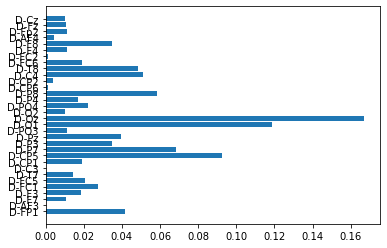

In [1087]:
data = data_delta.drop(['arousal', 'dominance', 'liking'], axis=1)
data['valence'] = np.where(data['valence'] >5, 'happy', 'sad')

data.columns = ['FP1','AF3','F7','F3','FC1','FC5','T7','C3','CP1','CP5','P7','P3','Pz','PO3','O1','Oz','O2','PO4','P4','P8','CP6','CP2','C4','T8','FC6','FC2','F4','F8','AF4','Fp2','Fz','Cz','valence']

from sklearn.model_selection import train_test_split

copia = data.copy()

y = copia[['valence']]

x = copia.drop(columns=['valence'])

    # test_size = 0.2 --> 80% datos para entrenamiento, 20% para test
    # max_depth --> The deeper the tree, the more splits it has and it captures more information about the data. En este modelo, valores altos de max_depths tienden a 'overfit' los datos, lo comprobamos en el siguiente bloque
xTrain, xTest, yTrain, yTest = train_test_split(x,y, test_size = 0.2, random_state = 1)

from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(max_depth=2, random_state=0, verbose=1, n_jobs=5)
clf.fit(xTrain, yTrain)

predict = clf.predict(xTest)

from sklearn.metrics import accuracy_score
print("Banda delta Random Forest : " + str(accuracy_score(yTest, predict)*100))

print(clf.feature_importances_)
plt.barh(['D-FP1','D-AF3','D-F7','D-F3','D-FC1','D-FC5','D-T7','D-C3','D-CP1','D-CP5','D-P7','D-P3','D-Pz','D-PO3','D-O1','D-Oz','D-O2','D-PO4','D-P4','D-P8','D-CP6','D-CP2','D-C4','D-T8','D-FC6','D-FC2','D-F4','D-F8','D-AF4','D-Fp2','D-Fz','D-Cz'], clf.feature_importances_)

importances = clf.feature_importances_
df_importances = pd.DataFrame(importances, ['D-FP1','D-AF3','D-F7','D-F3','D-FC1','D-FC5','D-T7','D-C3','D-CP1','D-CP5','D-P7','D-P3','D-Pz','D-PO3','D-O1','D-Oz','D-O2','D-PO4','D-P4','D-P8','D-CP6','D-CP2','D-C4','D-T8','D-FC6','D-FC2','D-F4','D-F8','D-AF4','D-Fp2','D-Fz','D-Cz'])
df_importances.columns = ['eeg']

res = df_importances.nlargest(8, 'eeg').index
delta_main_eeg = pd.DataFrame(data=data_delta, columns=res)
delta_main_eeg

<ipython-input-1088-267551ef1075>:21: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(xTrain, yTrain)
[Parallel(n_jobs=5)]: Using backend ThreadingBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:    0.0s
[Parallel(n_jobs=5)]: Done 100 out of 100 | elapsed:    0.0s finished
Banda theta Random Forest : 80.078125
[0.09819592 0.00468149 0.09923381 0.01286154 0.00724881 0.02144824
 0.01170071 0.01578321 0.01536876 0.09183578 0.00809831 0.01127901
 0.02906903 0.00388516 0.04827929 0.10072079 0.00829603 0.13895533
 0.01417425 0.0529769  0.00888084 0.00409358 0.00697575 0.13501224
 0.00472978 0.00609596 0.00162025 0.00161493 0.00162398 0.01236935
 0.00352565 0.01936533]
[Parallel(n_jobs=5)]: Using backend ThreadingBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:    0.0s
[Parallel(n_jobs=5)]: Done 100 o

,T-PO4,T-T8,T-Oz,T-F7,T-FP1,T-CP5,T-P8,T-O1
0,0.044981,0.041922,0.070345,0.045046,0.018908,0.050673,0.115800,0.029279
1,0.044981,0.041922,0.070345,0.045046,0.018908,0.050673,0.115800,0.029279
2,0.044981,0.041922,0.070345,0.045046,0.018908,0.050673,0.115800,0.029279
3,0.044981,0.041922,0.070345,0.045046,0.018908,0.050673,0.115800,0.029279
4,0.044981,0.041922,0.070345,0.045046,0.018908,0.050673,0.115800,0.029279
...,...,...,...,...,...,...,...,...
2555,0.084119,0.034971,0.277411,0.067325,0.024220,0.224839,0.391203,0.119525
2556,0.084119,0.034971,0.277411,0.067325,0.024220,0.224839,0.391203,0.119525
2557,0.084119,0.034971,0.277411,0.067325,0.024220,0.224839,0.391203,0.119525
2558,0.084119,0.034971,0.277411,0.067325,0.024220,0.224839,0.391203,0.119525


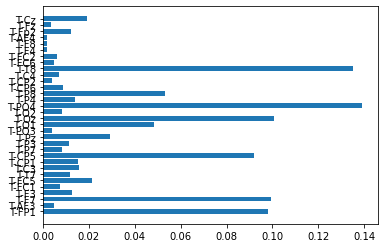

In [1088]:
data = data_theta.drop(['arousal', 'dominance', 'liking'], axis=1)
data['valence'] = np.where(data['valence'] >5, 'happy', 'sad')

data.columns = ['FP1','AF3','F7','F3','FC1','FC5','T7','C3','CP1','CP5','P7','P3','Pz','PO3','O1','Oz','O2','PO4','P4','P8','CP6','CP2','C4','T8','FC6','FC2','F4','F8','AF4','Fp2','Fz','Cz','valence']

from sklearn.model_selection import train_test_split

copia = data.copy()

y = copia[['valence']]

x = copia.drop(columns=['valence'])

    # test_size = 0.2 --> 80% datos para entrenamiento, 20% para test
    # max_depth --> The deeper the tree, the more splits it has and it captures more information about the data. En este modelo, valores altos de max_depths tienden a 'overfit' los datos, lo comprobamos en el siguiente bloque
xTrain, xTest, yTrain, yTest = train_test_split(x,y, test_size = 0.2, random_state = 1)

from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(max_depth=2, random_state=0, verbose=1, n_jobs=5)
clf.fit(xTrain, yTrain)

predict = clf.predict(xTest)

from sklearn.metrics import accuracy_score
print("Banda theta Random Forest : " + str(accuracy_score(yTest, predict)*100))

print(clf.feature_importances_)
plt.barh(['T-FP1','T-AF3','T-F7','T-F3','T-FC1','T-FC5','T-T7','T-C3','T-CP1','T-CP5','T-P7','T-P3','T-Pz','T-PO3','T-O1','T-Oz','T-O2','T-PO4','T-P4','T-P8','T-CP6','T-CP2','T-C4','T-T8','T-FC6','T-FC2','T-F4','T-F8','T-AF4','T-Fp2','T-Fz','T-Cz'], clf.feature_importances_)

importances = clf.feature_importances_
df_importances = pd.DataFrame(importances, ['T-FP1','T-AF3','T-F7','T-F3','T-FC1','T-FC5','T-T7','T-C3','T-CP1','T-CP5','T-P7','T-P3','T-Pz','T-PO3','T-O1','T-Oz','T-O2','T-PO4','T-P4','T-P8','T-CP6','T-CP2','T-C4','T-T8','T-FC6','T-FC2','T-F4','T-F8','T-AF4','T-Fp2','T-Fz','T-Cz'])
df_importances.columns = ['eeg']

res = df_importances.nlargest(8, 'eeg').index
theta_main_eeg = pd.DataFrame(data=data_theta, columns=res)
theta_main_eeg

<ipython-input-1089-7f1424c2093c>:21: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(xTrain, yTrain)
[Parallel(n_jobs=5)]: Using backend ThreadingBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:    0.0s
[Parallel(n_jobs=5)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=5)]: Using backend ThreadingBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:    0.0s
Banda alpha Random Forest : 80.6640625
[0.0331442  0.00116966 0.04643944 0.01672359 0.         0.0438002
 0.00193871 0.01256655 0.01197766 0.07545351 0.0087105  0.01050618
 0.04717782 0.00506065 0.06413261 0.11983906 0.01640572 0.08937933
 0.06463665 0.00998058 0.01860329 0.00536786 0.02194298 0.19588906
 0.00193429 0.00244861 0.01007633 0.00020447 0.00174307 0.03737197
 0.0099081  0.01546738]
[Parallel(n_jobs=5)]: Done 100 o

,A-T8,A-Oz,A-PO4,A-CP5,A-P4,A-O1,A-Pz,A-F7
0,0.043292,0.093411,0.060857,0.073060,0.054885,0.045188,0.085763,0.063804
1,0.043292,0.093411,0.060857,0.073060,0.054885,0.045188,0.085763,0.063804
2,0.043292,0.093411,0.060857,0.073060,0.054885,0.045188,0.085763,0.063804
3,0.043292,0.093411,0.060857,0.073060,0.054885,0.045188,0.085763,0.063804
4,0.043292,0.093411,0.060857,0.073060,0.054885,0.045188,0.085763,0.063804
...,...,...,...,...,...,...,...,...
2555,0.055798,0.390003,0.179263,0.349438,0.133225,0.134192,0.432440,0.094489
2556,0.055798,0.390003,0.179263,0.349438,0.133225,0.134192,0.432440,0.094489
2557,0.055798,0.390003,0.179263,0.349438,0.133225,0.134192,0.432440,0.094489
2558,0.055798,0.390003,0.179263,0.349438,0.133225,0.134192,0.432440,0.094489


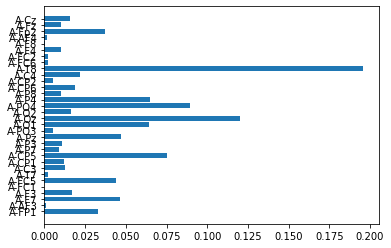

In [1089]:
data = data_alpha.drop(['arousal', 'dominance', 'liking'], axis=1)
data['valence'] = np.where(data['valence'] >5, 'happy', 'sad')

data.columns = ['FP1','AF3','F7','F3','FC1','FC5','T7','C3','CP1','CP5','P7','P3','Pz','PO3','O1','Oz','O2','PO4','P4','P8','CP6','CP2','C4','T8','FC6','FC2','F4','F8','AF4','Fp2','Fz','Cz','valence']

from sklearn.model_selection import train_test_split

copia = data.copy()

y = copia[['valence']]

x = copia.drop(columns=['valence'])

    # test_size = 0.2 --> 80% datos para entrenamiento, 20% para test
    # max_depth --> The deeper the tree, the more splits it has and it captures more information about the data. En este modelo, valores altos de max_depths tienden a 'overfit' los datos, lo comprobamos en el siguiente bloque
xTrain, xTest, yTrain, yTest = train_test_split(x,y, test_size = 0.2, random_state = 1)

from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(max_depth=2, random_state=0, verbose=1, n_jobs=5)
clf.fit(xTrain, yTrain)

predict = clf.predict(xTest)

from sklearn.metrics import accuracy_score
print("Banda alpha Random Forest : " + str(accuracy_score(yTest, predict)*100))

print(clf.feature_importances_)
plt.barh(['A-FP1','A-AF3','A-F7','A-F3','A-FC1','A-FC5','A-T7','A-C3','A-CP1','A-CP5','A-P7','A-P3','A-Pz','A-PO3','A-O1','A-Oz','A-O2','A-PO4','A-P4','A-P8','A-CP6','A-CP2','A-C4','A-T8','A-FC6','A-FC2','A-F4','A-F8','A-AF4','A-Fp2','A-Fz','A-Cz'], clf.feature_importances_)

importances = clf.feature_importances_
df_importances = pd.DataFrame(importances, ['A-FP1','A-AF3','A-F7','A-F3','A-FC1','A-FC5','A-T7','A-C3','A-CP1','A-CP5','A-P7','A-P3','A-Pz','A-PO3','A-O1','A-Oz','A-O2','A-PO4','A-P4','A-P8','A-CP6','A-CP2','A-C4','A-T8','A-FC6','A-FC2','A-F4','A-F8','A-AF4','A-Fp2','A-Fz','A-Cz'])
df_importances.columns = ['eeg']

res = df_importances.nlargest(8, 'eeg').index
alpha_main_eeg = pd.DataFrame(data=data_alpha, columns=res)
alpha_main_eeg

<ipython-input-1090-bb7aa81841b2>:21: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(xTrain, yTrain)
[Parallel(n_jobs=5)]: Using backend ThreadingBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:    0.0s
[Parallel(n_jobs=5)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=5)]: Using backend ThreadingBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:    0.0s
[Parallel(n_jobs=5)]: Done 100 out of 100 | elapsed:    0.1s finished
Banda beta Random Forest : 79.8828125
[0.01097515 0.0224326  0.03729969 0.05250018 0.00150367 0.05273452
 0.02167166 0.00269202 0.01035872 0.02420871 0.00376232 0.07078465
 0.02017948 0.00234543 0.01042674 0.04017158 0.02308742 0.04689109
 0.10075791 0.00560084 0.03314191 0.01310084 0.00148544 0.15274419
 0.13197595 0.06405674 0.00226143 0.00198753 0.005508

,B-T8,B-FC6,B-P4,B-P3,B-FC2,B-FC5,B-F3,B-PO4
0,0.065353,0.510457,0.195721,0.488864,0.789394,0.270968,0.835856,0.352887
1,0.065353,0.510457,0.195721,0.488864,0.789394,0.270968,0.835856,0.352887
2,0.065353,0.510457,0.195721,0.488864,0.789394,0.270968,0.835856,0.352887
3,0.065353,0.510457,0.195721,0.488864,0.789394,0.270968,0.835856,0.352887
4,0.065353,0.510457,0.195721,0.488864,0.789394,0.270968,0.835856,0.352887
...,...,...,...,...,...,...,...,...
2555,0.337323,0.717518,0.679573,0.620132,0.228581,0.264139,1.300983,0.855861
2556,0.337323,0.717518,0.679573,0.620132,0.228581,0.264139,1.300983,0.855861
2557,0.337323,0.717518,0.679573,0.620132,0.228581,0.264139,1.300983,0.855861
2558,0.337323,0.717518,0.679573,0.620132,0.228581,0.264139,1.300983,0.855861


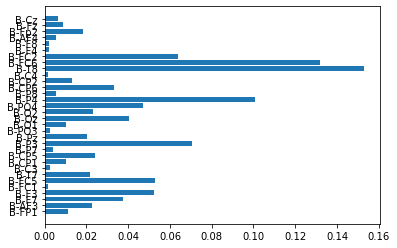

In [1090]:
data = data_beta.drop(['arousal', 'dominance', 'liking'], axis=1)
data['valence'] = np.where(data['valence'] >5, 'happy', 'sad')

data.columns = ['FP1','AF3','F7','F3','FC1','FC5','T7','C3','CP1','CP5','P7','P3','Pz','PO3','O1','Oz','O2','PO4','P4','P8','CP6','CP2','C4','T8','FC6','FC2','F4','F8','AF4','Fp2','Fz','Cz','valence']

from sklearn.model_selection import train_test_split

copia = data.copy()

y = copia[['valence']]

x = copia.drop(columns=['valence'])

    # test_size = 0.2 --> 80% datos para entrenamiento, 20% para test
    # max_depth --> The deeper the tree, the more splits it has and it captures more information about the data. En este modelo, valores altos de max_depths tienden a 'overfit' los datos, lo comprobamos en el siguiente bloque
xTrain, xTest, yTrain, yTest = train_test_split(x,y, test_size = 0.2, random_state = 1)

from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(max_depth=2, random_state=0, verbose=1, n_jobs=5)
clf.fit(xTrain, yTrain)

predict = clf.predict(xTest)

from sklearn.metrics import accuracy_score
print("Banda beta Random Forest : " + str(accuracy_score(yTest, predict)*100))

print(clf.feature_importances_)
plt.barh(['B-FP1','B-AF3','B-F7','B-F3','B-FC1','B-FC5','B-T7','B-C3','B-CP1','B-CP5','B-P7','B-P3','B-Pz','B-PO3','B-O1','B-Oz','B-O2','B-PO4','B-P4','B-P8','B-CP6','B-CP2','B-C4','B-T8','B-FC6','B-FC2','B-F4','B-F8','B-AF4','B-Fp2','B-Fz','B-Cz'], clf.feature_importances_)

importances = clf.feature_importances_
df_importances = pd.DataFrame(importances,['B-FP1','B-AF3','B-F7','B-F3','B-FC1','B-FC5','B-T7','B-C3','B-CP1','B-CP5','B-P7','B-P3','B-Pz','B-PO3','B-O1','B-Oz','B-O2','B-PO4','B-P4','B-P8','B-CP6','B-CP2','B-C4','B-T8','B-FC6','B-FC2','B-F4','B-F8','B-AF4','B-Fp2','B-Fz','B-Cz'])
df_importances.columns = ['eeg']

res = df_importances.nlargest(8, 'eeg').index
beta_main_eeg = pd.DataFrame(data=data_beta, columns=res)
beta_main_eeg

<ipython-input-1091-44c3381fad27>:21: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(xTrain, yTrain)
[Parallel(n_jobs=5)]: Using backend ThreadingBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:    0.0s
[Parallel(n_jobs=5)]: Done 100 out of 100 | elapsed:    0.1s finished
Banda gamma Random Forest : 79.6875
[0.02554787 0.06639153 0.01692705 0.07242806 0.07843581 0.0191256
 0.01348098 0.00471828 0.00530369 0.00649185 0.01361296 0.01381916
 0.00325557 0.04866772 0.02107548 0.00769365 0.02896021 0.10091124
 0.05951911 0.00225145 0.01481298 0.00137089 0.02846503 0.03806869
 0.11548758 0.02047493 0.01898119 0.08678148 0.00858193 0.00178233
 0.05657566 0.        ]
[Parallel(n_jobs=5)]: Using backend ThreadingBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:    0.0s
[Parallel(n_jobs=5)]: Done 100 out 

,G-FC6,G-PO4,G-F8,G-FC1,G-F3,G-AF3,G-P4,G-Fz
0,0.348758,0.251333,0.580807,0.571668,0.417305,0.425451,0.339614,0.960447
1,0.348758,0.251333,0.580807,0.571668,0.417305,0.425451,0.339614,0.960447
2,0.348758,0.251333,0.580807,0.571668,0.417305,0.425451,0.339614,0.960447
3,0.348758,0.251333,0.580807,0.571668,0.417305,0.425451,0.339614,0.960447
4,0.348758,0.251333,0.580807,0.571668,0.417305,0.425451,0.339614,0.960447
...,...,...,...,...,...,...,...,...
2555,1.971791,2.304287,3.076131,2.326301,3.372740,0.449814,1.997941,6.491435
2556,1.971791,2.304287,3.076131,2.326301,3.372740,0.449814,1.997941,6.491435
2557,1.971791,2.304287,3.076131,2.326301,3.372740,0.449814,1.997941,6.491435
2558,1.971791,2.304287,3.076131,2.326301,3.372740,0.449814,1.997941,6.491435


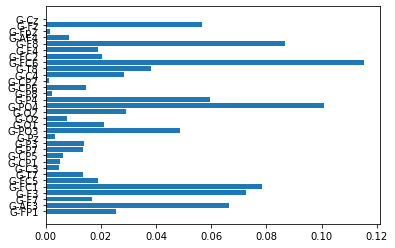

In [1091]:
data = data_gamma.drop(['arousal', 'dominance', 'liking'], axis=1)
data['valence'] = np.where(data['valence'] >5, 'happy', 'sad')

data.columns = ['FP1','AF3','F7','F3','FC1','FC5','T7','C3','CP1','CP5','P7','P3','Pz','PO3','O1','Oz','O2','PO4','P4','P8','CP6','CP2','C4','T8','FC6','FC2','F4','F8','AF4','Fp2','Fz','Cz','valence']

from sklearn.model_selection import train_test_split

copia = data.copy()

y = copia[['valence']]

x = copia.drop(columns=['valence'])

    # test_size = 0.2 --> 80% datos para entrenamiento, 20% para test
    # max_depth --> The deeper the tree, the more splits it has and it captures more information about the data. En este modelo, valores altos de max_depths tienden a 'overfit' los datos, lo comprobamos en el siguiente bloque
xTrain, xTest, yTrain, yTest = train_test_split(x,y, test_size = 0.2, random_state = 1)

from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(max_depth=2, random_state=0, verbose=1, n_jobs=5)
clf.fit(xTrain, yTrain)

predict = clf.predict(xTest)

from sklearn.metrics import accuracy_score
print("Banda gamma Random Forest : " + str(accuracy_score(yTest, predict)*100))

print(clf.feature_importances_)
plt.barh(['G-FP1','G-AF3','G-F7','G-F3','G-FC1','G-FC5','G-T7','G-C3','G-CP1','G-CP5','G-P7','G-P3','G-Pz','G-PO3','G-O1','G-Oz','G-O2','G-PO4','G-P4','G-P8','G-CP6','G-CP2','G-C4','G-T8','G-FC6','G-FC2','G-F4','G-F8','G-AF4','G-Fp2','G-Fz','G-Cz'], clf.feature_importances_)

importances = clf.feature_importances_
df_importances = pd.DataFrame(importances, ['G-FP1','G-AF3','G-F7','G-F3','G-FC1','G-FC5','G-T7','G-C3','G-CP1','G-CP5','G-P7','G-P3','G-Pz','G-PO3','G-O1','G-Oz','G-O2','G-PO4','G-P4','G-P8','G-CP6','G-CP2','G-C4','G-T8','G-FC6','G-FC2','G-F4','G-F8','G-AF4','G-Fp2','G-Fz','G-Cz'])
df_importances.columns = ['eeg']

res = df_importances.nlargest(8, 'eeg').index
gamma_main_eeg = pd.DataFrame(data=data_gamma, columns=res)
gamma_main_eeg

In [1092]:
frames = [delta_main_eeg, theta_main_eeg, alpha_main_eeg, beta_main_eeg, gamma_main_eeg]
aux_all_bands = pd.concat(frames, axis=1)
all_bands_df = aux_all_bands.merge(aux_labels, left_index=True, right_index=True)
all_bands_df

,D-Oz,D-O1,D-CP5,D-P7,D-P8,D-C4,D-T8,D-FP1,T-PO4,T-T8,...,G-F8,G-FC1,G-F3,G-AF3,G-P4,G-Fz,valence,arousal,dominance,liking
0,0.046685,0.020003,0.033372,0.085921,0.075082,0.372899,0.035648,0.025366,0.044981,0.041922,...,0.580807,0.571668,0.417305,0.425451,0.339614,0.960447,8.13,4.83,9.0,4.87
1,0.046685,0.020003,0.033372,0.085921,0.075082,0.372899,0.035648,0.025366,0.044981,0.041922,...,0.580807,0.571668,0.417305,0.425451,0.339614,0.960447,8.13,4.83,9.0,4.87
2,0.046685,0.020003,0.033372,0.085921,0.075082,0.372899,0.035648,0.025366,0.044981,0.041922,...,0.580807,0.571668,0.417305,0.425451,0.339614,0.960447,8.13,4.83,9.0,4.87
3,0.046685,0.020003,0.033372,0.085921,0.075082,0.372899,0.035648,0.025366,0.044981,0.041922,...,0.580807,0.571668,0.417305,0.425451,0.339614,0.960447,8.13,4.83,9.0,4.87
4,0.046685,0.020003,0.033372,0.085921,0.075082,0.372899,0.035648,0.025366,0.044981,0.041922,...,0.580807,0.571668,0.417305,0.425451,0.339614,0.960447,8.13,4.83,9.0,4.87
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2555,0.258350,0.117405,0.188437,0.097377,0.380764,1.544856,0.022754,0.022481,0.084119,0.034971,...,3.076131,2.326301,3.372740,0.449814,1.997941,6.491435,7.15,4.03,9.0,1.88
2556,0.258350,0.117405,0.188437,0.097377,0.380764,1.544856,0.022754,0.022481,0.084119,0.034971,...,3.076131,2.326301,3.372740,0.449814,1.997941,6.491435,7.15,4.03,9.0,1.88
2557,0.258350,0.117405,0.188437,0.097377,0.380764,1.544856,0.022754,0.022481,0.084119,0.034971,...,3.076131,2.326301,3.372740,0.449814,1.997941,6.491435,7.15,4.03,9.0,1.88
2558,0.258350,0.117405,0.188437,0.097377,0.380764,1.544856,0.022754,0.022481,0.084119,0.034971,...,3.076131,2.326301,3.372740,0.449814,1.997941,6.491435,7.15,4.03,9.0,1.88


In [1093]:
data = all_bands_df.drop(['arousal', 'dominance', 'liking'], axis=1)
data['valence'] = np.where(data['valence'] >5, 'happy', 'sad')

from sklearn.model_selection import train_test_split

copia = data.copy()

y = copia[['valence']]

x = copia.drop(columns=['valence'])

xTrain, xTest, yTrain, yTest = train_test_split(x,y, test_size = 0.2, random_state = 1)

from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(max_depth=2, random_state=0, verbose=1, n_jobs=5)
clf.fit(xTrain, yTrain)

predict = clf.predict(xTest)

from sklearn.metrics import accuracy_score

    
from sklearn import svm
from sklearn.svm import LinearSVC

svm_clf = svm.LinearSVC()
svm_clf.fit(xTrain, np.ravel(yTrain))
svm_predict = svm_clf.predict(xTest)

from sklearn.neighbors import KNeighborsClassifier

n_neighbors = 7

knn = KNeighborsClassifier(n_neighbors)
knn.fit(xTrain, np.ravel(yTrain))
knn_predict = knn.predict(xTest)

rf_acc2 = accuracy_score(yTest, predict)
svm_acc2 = accuracy_score(yTest, svm_predict)
knn_acc2 = accuracy_score(yTest, knn_predict)
'''
print("Selección de canales propia :")
print("Random Forest: " + str(accuracy_score(yTest, predict)*100))
print("SVM : " + str(accuracy_score(yTest, svm_predict)*100))
print("kNN : " + str(accuracy_score(yTest, knn_predict)*100))
'''

<ipython-input-1093-e2b468d561bb>:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(xTrain, yTrain)
[Parallel(n_jobs=5)]: Using backend ThreadingBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:    0.0s
[Parallel(n_jobs=5)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=5)]: Using backend ThreadingBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:    0.0s
[Parallel(n_jobs=5)]: Done 100 out of 100 | elapsed:    0.0s finished
C:\Python39\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


'\nprint("Selección de canales propia :")\nprint("Random Forest: " + str(accuracy_score(yTest, predict)*100))\nprint("SVM : " + str(accuracy_score(yTest, svm_predict)*100))\nprint("kNN : " + str(accuracy_score(yTest, knn_predict)*100))\n'

Selección de canales literatura :
Random Forest: 91.015625
SVM : 71.875
kNN : 95.703125

Selección de canales propia :
Random Forest: 89.453125
SVM : 72.8515625
kNN : 96.6796875

In [1094]:
col_names = ['Subject',
             'Experiment ID',
             'Feature extraction',
             'Band selection',
             'Channel selection',
             'Classification algorithm',
             'Accuracy']

data_CSV = [subject_id, 4, "STFT", "All bands", "Literature", "Random Forest", rf_acc], [subject_id, 4, "STFT", "All bands", "Literature", "SVM", svm_acc], [subject_id, 4, "STFT", "All bands", "Literature", "kNN", knn_acc], [subject_id, 4, "STFT", "All bands", "Own", "Random Forest", rf_acc2], [subject_id, 4, "STFT", "All bands", "Own", "SVM", svm_acc2], [subject_id, 4, "STFT", "All bands", "Own", "kNN", knn_acc2] 
all_data = data_CSV

csv_df = pd.DataFrame(all_data, columns=col_names)

csv_df.to_csv("experiment4.csv", mode="a", header=False, index=False)